In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-genre-classification/dataset.csv


In [2]:
datatrain = pd.read_csv("/kaggle/input/music-genre-classification/dataset.csv")

In [3]:
datatrain.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [4]:
datatrain = datatrain.set_index("filename")

In [5]:
datatrain.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378669,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479170,99.552199,-8.921949,36.293061,...,-6.021121,4.471604,-4.797232,1.781547,-3.870276,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,0.081706,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235659,31.331904,21.695015,16.666986,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064026,-1.527147,-89.901138,-18.768461,...,-28.052265,-15.805225,-27.542309,-12.598773,-17.545473,-15.693589,-17.227766,-11.975698,-18.504187,-19.935202
25%,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695129,76.811485,-24.223789,24.107393,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194296,-2.003978,-4.670281,-3.367999
50%,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206070,98.452553,-10.716073,36.957073,...,-5.920161,3.891842,-4.199810,1.879423,-3.614473,1.211945,-4.059109,0.669789,-2.391261,-1.155198
75%,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895018,119.893629,5.505793,48.212825,...,-1.004241,9.706133,-0.161017,5.155263,-0.323536,4.350694,-0.842968,3.112519,0.149070,1.303739
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034588,193.096512,56.666088,80.691277,...,17.421038,23.037573,13.054334,18.161661,12.357588,13.468802,11.489994,15.379257,14.686911,15.368967


In [6]:
datatrain.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [7]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of labelencoder
#labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
#datatrain['label'] = labelencoder.fit_transform(datatrain["label"])
#datatrain

In [8]:
X = datatrain.iloc[: ,:-1].values
Y = datatrain['label'].values

In [9]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [25]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750, 26), (750, 10), (250, 26), (250, 10))

In [26]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750, 26), (750, 10), (250, 26), (250, 10))

In [12]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750, 26, 1), (750, 10), (250, 26, 1), (250, 10))

In [13]:
import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [22]:
x_train[0].shape

(26, 1)

In [54]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax')) 
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               13824     
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

In [55]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

In [19]:
# building the model:
model = Sequential()
model.add(Conv1D(64, 8, padding='same',activation = 'relu',input_shape=(x_train.shape[1],1)))  
model.add(Conv1D(64, 8, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(32, 8, padding='same', activation='relu'))
model.add(Conv1D(32, 8, padding='same', activation='relu'))
model.add(Dropout(0.4))
model.add(Conv1D(16, 8, padding='same', activation='relu'))
model.add(Conv1D(16, 8, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(8, 8, padding='same', activation='relu'))
model.add(Conv1D(8, 8, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) 
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 26, 64)            576       
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 26, 64)            32832     
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 64)            256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 64)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 8, 32)             16416     
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 8, 32)            

In [56]:
checkpointer = ModelCheckpoint('music_genre.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(x_train, y_train, batch_size=64, epochs=250, validation_data=(x_test, y_test), callbacks=[checkpointer])

Epoch 1/250
 1/12 [=>............................] - ETA: 0s - loss: 2.3352 - acc: 0.0625
Epoch 00001: val_acc improved from -inf to 0.29600, saving model to music_genre.h5
12/12 [==============================] - 0s 16ms/step - loss: 2.1842 - acc: 0.2320 - val_loss: 1.9457 - val_acc: 0.2960
Epoch 2/250
 1/12 [=>............................] - ETA: 0s - loss: 1.9497 - acc: 0.3125
Epoch 00002: val_acc improved from 0.29600 to 0.32000, saving model to music_genre.h5
12/12 [==============================] - 0s 7ms/step - loss: 1.8937 - acc: 0.3293 - val_loss: 1.7702 - val_acc: 0.3200
Epoch 3/250
 1/12 [=>............................] - ETA: 0s - loss: 1.8667 - acc: 0.3594
Epoch 00003: val_acc improved from 0.32000 to 0.35600, saving model to music_genre.h5
12/12 [==============================] - 0s 7ms/step - loss: 1.7557 - acc: 0.3560 - val_loss: 1.6368 - val_acc: 0.3560
Epoch 4/250
 1/12 [=>............................] - ETA: 0s - loss: 1.6208 - acc: 0.4062
Epoch 00004: val_acc improv

Epoch 31/250
 1/12 [=>............................] - ETA: 0s - loss: 0.6345 - acc: 0.7812
Epoch 00031: val_acc did not improve from 0.64000
12/12 [==============================] - 0s 5ms/step - loss: 0.7457 - acc: 0.7453 - val_loss: 1.0398 - val_acc: 0.6360
Epoch 32/250
 1/12 [=>............................] - ETA: 0s - loss: 0.7697 - acc: 0.6875
Epoch 00032: val_acc did not improve from 0.64000
12/12 [==============================] - 0s 5ms/step - loss: 0.7191 - acc: 0.7480 - val_loss: 1.0759 - val_acc: 0.6120
Epoch 33/250
 1/12 [=>............................] - ETA: 0s - loss: 0.6741 - acc: 0.7656
Epoch 00033: val_acc did not improve from 0.64000
12/12 [==============================] - 0s 5ms/step - loss: 0.6932 - acc: 0.7640 - val_loss: 1.0306 - val_acc: 0.6320
Epoch 34/250
 1/12 [=>............................] - ETA: 0s - loss: 0.5646 - acc: 0.8125
Epoch 00034: val_acc improved from 0.64000 to 0.65200, saving model to music_genre.h5
12/12 [==============================] - 0s

Epoch 62/250
 1/12 [=>............................] - ETA: 0s - loss: 0.3470 - acc: 0.9062
Epoch 00062: val_acc did not improve from 0.68400
12/12 [==============================] - 0s 4ms/step - loss: 0.3637 - acc: 0.8787 - val_loss: 1.1586 - val_acc: 0.6680
Epoch 63/250
 1/12 [=>............................] - ETA: 0s - loss: 0.4049 - acc: 0.8906
Epoch 00063: val_acc did not improve from 0.68400
12/12 [==============================] - 0s 5ms/step - loss: 0.4036 - acc: 0.8720 - val_loss: 1.1352 - val_acc: 0.6640
Epoch 64/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1874 - acc: 0.9531
Epoch 00064: val_acc did not improve from 0.68400
12/12 [==============================] - 0s 5ms/step - loss: 0.3576 - acc: 0.8880 - val_loss: 1.1687 - val_acc: 0.6640
Epoch 65/250
 1/12 [=>............................] - ETA: 0s - loss: 0.5317 - acc: 0.8281
Epoch 00065: val_acc did not improve from 0.68400
12/12 [==============================] - 0s 5ms/step - loss: 0.3997 - acc: 0.87

Epoch 93/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1600 - acc: 0.9531
Epoch 00093: val_acc did not improve from 0.70000
12/12 [==============================] - 0s 4ms/step - loss: 0.2169 - acc: 0.9360 - val_loss: 1.3151 - val_acc: 0.6920
Epoch 94/250
 1/12 [=>............................] - ETA: 0s - loss: 0.2337 - acc: 0.9375
Epoch 00094: val_acc did not improve from 0.70000
12/12 [==============================] - 0s 4ms/step - loss: 0.2107 - acc: 0.9360 - val_loss: 1.2777 - val_acc: 0.6880
Epoch 95/250
 1/12 [=>............................] - ETA: 0s - loss: 0.3422 - acc: 0.8750
Epoch 00095: val_acc did not improve from 0.70000
12/12 [==============================] - 0s 5ms/step - loss: 0.2218 - acc: 0.9253 - val_loss: 1.2167 - val_acc: 0.6880
Epoch 96/250
 1/12 [=>............................] - ETA: 0s - loss: 0.2159 - acc: 0.8906
Epoch 00096: val_acc improved from 0.70000 to 0.70800, saving model to music_genre.h5
12/12 [==============================] - 0s

 1/12 [=>............................] - ETA: 0s - loss: 0.0897 - acc: 0.9688
Epoch 00124: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 5ms/step - loss: 0.1682 - acc: 0.9587 - val_loss: 1.4059 - val_acc: 0.6880
Epoch 125/250
 1/12 [=>............................] - ETA: 0s - loss: 0.2396 - acc: 0.9219
Epoch 00125: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.1975 - acc: 0.9387 - val_loss: 1.4025 - val_acc: 0.6920
Epoch 126/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1508 - acc: 0.9375
Epoch 00126: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.1388 - acc: 0.9520 - val_loss: 1.3811 - val_acc: 0.6800
Epoch 127/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1061 - acc: 0.9844
Epoch 00127: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 5ms/step - loss: 0.1128 - acc: 0.9747 - val_l

Epoch 156/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0640 - acc: 0.9688
Epoch 00156: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0984 - acc: 0.9667 - val_loss: 1.5330 - val_acc: 0.6840
Epoch 157/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0768 - acc: 0.9531
Epoch 00157: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0998 - acc: 0.9667 - val_loss: 1.6288 - val_acc: 0.6720
Epoch 158/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0998 - acc: 0.9531
Epoch 00158: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.1019 - acc: 0.9707 - val_loss: 1.7216 - val_acc: 0.6880
Epoch 159/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1230 - acc: 0.9688
Epoch 00159: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0877 - acc: 

Epoch 188/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1845 - acc: 0.9375
Epoch 00188: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 5ms/step - loss: 0.0945 - acc: 0.9733 - val_loss: 1.7669 - val_acc: 0.6920
Epoch 189/250
 1/12 [=>............................] - ETA: 0s - loss: 0.1716 - acc: 0.9375
Epoch 00189: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 5ms/step - loss: 0.0929 - acc: 0.9680 - val_loss: 1.6630 - val_acc: 0.6800
Epoch 190/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0713 - acc: 0.9688
Epoch 00190: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0977 - acc: 0.9680 - val_loss: 1.6940 - val_acc: 0.6760
Epoch 191/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0525 - acc: 0.9844
Epoch 00191: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0644 - acc: 

Epoch 220/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0418 - acc: 0.9844
Epoch 00220: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0739 - acc: 0.9760 - val_loss: 1.7827 - val_acc: 0.6920
Epoch 221/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0811 - acc: 0.9688
Epoch 00221: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0534 - acc: 0.9840 - val_loss: 1.7558 - val_acc: 0.6920
Epoch 222/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0459 - acc: 1.0000
Epoch 00222: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0714 - acc: 0.9813 - val_loss: 1.8098 - val_acc: 0.6960
Epoch 223/250
 1/12 [=>............................] - ETA: 0s - loss: 0.0233 - acc: 1.0000
Epoch 00223: val_acc did not improve from 0.71200
12/12 [==============================] - 0s 4ms/step - loss: 0.0504 - acc: 

In [58]:
present_model = tf.keras.models.load_model('music_genre.h5')
present_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               13824     
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

In [59]:
print("Accuracy of our model on test data : " , present_model.evaluate(x_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 1ms/step - loss: 2.0749 - acc: 0.7120
Accuracy of our model on test data :  71.20000123977661 %


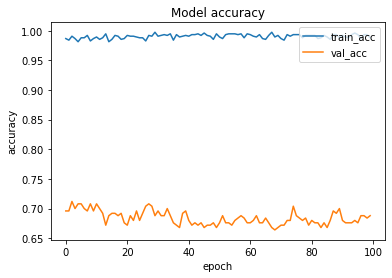

In [61]:
# plot the training artifacts
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

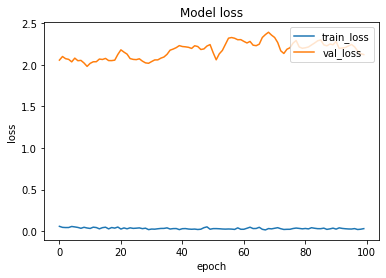

In [62]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [63]:
# predicting on test data.
pred_test = present_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)

In [64]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,rock,rock
1,disco,reggae
2,country,country
3,jazz,jazz
4,metal,metal
5,rock,rock
6,blues,blues
7,country,country
8,rock,disco
9,pop,pop
